# Linear Regression Analysis - California Housing Dataset


In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
import statsmodels.api as sm

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [ ]:
%matplotlib inline

load in the dataset from github

In [ ]:
path = "https://raw.githubusercontent.com/MuhammadMunir97/california-housing-analysis/main/housing.csv"
housing_data = pd.read_csv(path)

## Examine the Data

---

The data has 9 (longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity) attributes, two of which describe the location of the house. Ocean proximity, is a string attribute and should be converted into a disctinct set of numeric value to perform analysis. 

## File Summary:
1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea 

In [ ]:
# Examining attributes and consistency 
housing_data.keys()
housing_data.head()
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


From the histograms we can see that we have a normal distribution for most of the variables, this ensures the dataset is well spreadout and encompases the holistic picture.

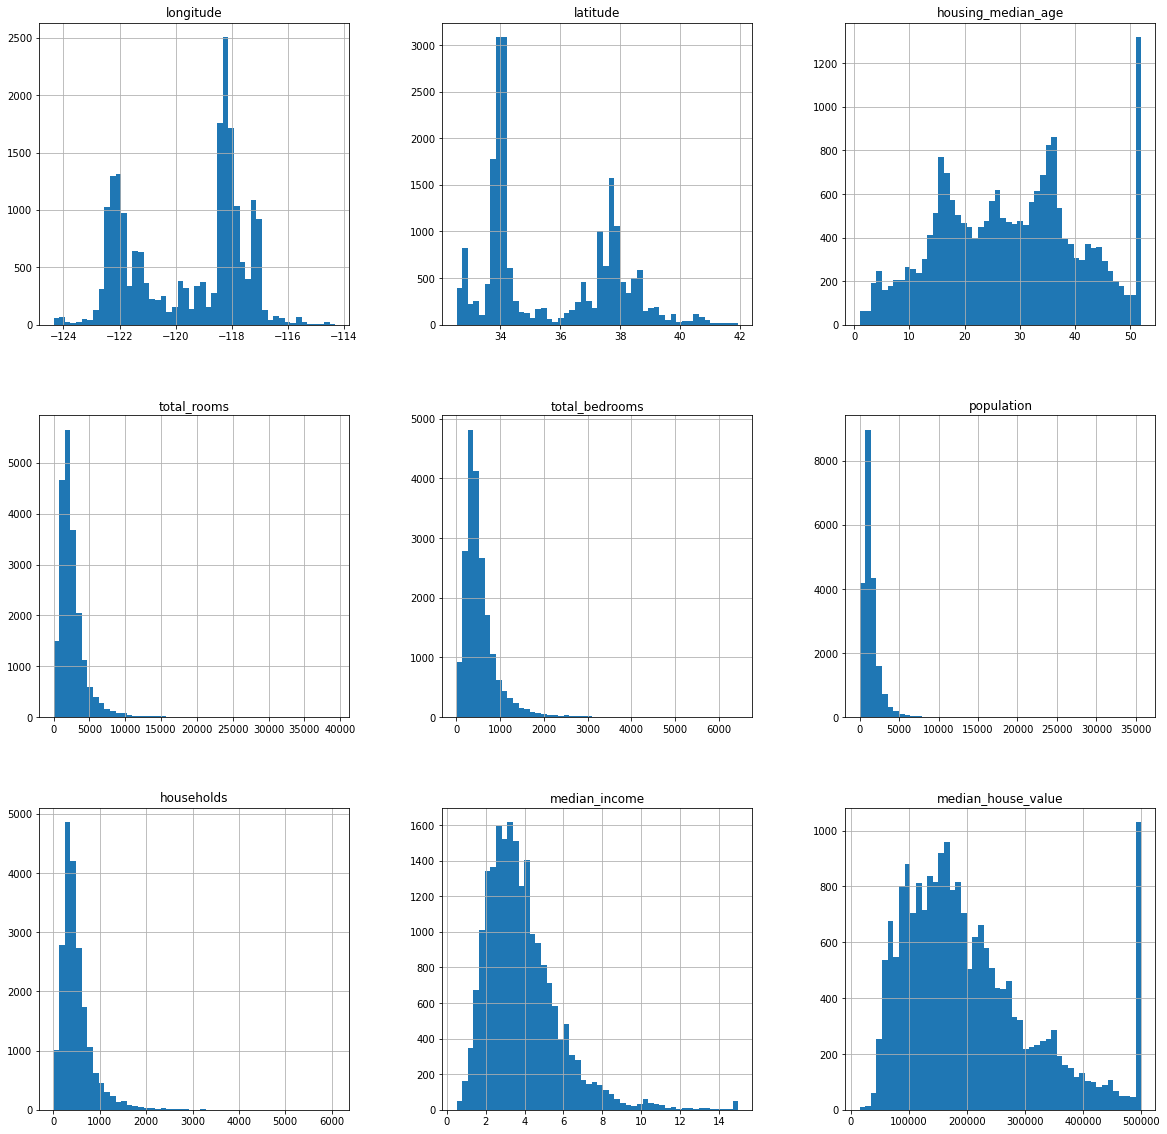

In [ ]:
housing_data.hist(bins=50, figsize=(20, 20))
plt.show()

### Data preprocessing
total_bedrooms has 207 null values, they need to be dealt with appropriately. We can either replace the null values with the mean of the set or just delete them and build a model relative to non null values. The ocean proximity attribute needs to be converted to a numeric column for analysis to be conducted.

In [ ]:
housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
housing_data.ocean_proximity = pd.Categorical(housing_data.ocean_proximity)
housing_data.ocean_proximity.unique()
housing_data.ocean_proximity = housing_data.ocean_proximity.cat.codes

## Attribute Selection

We look at variables that have a high corelation with our Y - Variable (Median Value of the House). The goal is to find a model in which we can use a prediction attribute to correctly predict the house value. The highest corelation with the median house value, is the median income of the households surrounding the house. 

In between the variable their is a high corelation between total rooms to total bedrooms, which makes sense as if the number of your bedrooms increase then the total number of rooms also increase. Their is a high corelation between total rooms and population, this is most likely to show that if the population in an area is dense than there would be more rooms required to accomodate those people.

Furthermore their is a high corelation between household to population and total bedrooms, this shows that densely populated areas tend to have a higher number of houses.

## Variables selected:

1. total rooms
2. housing median age
3. median income

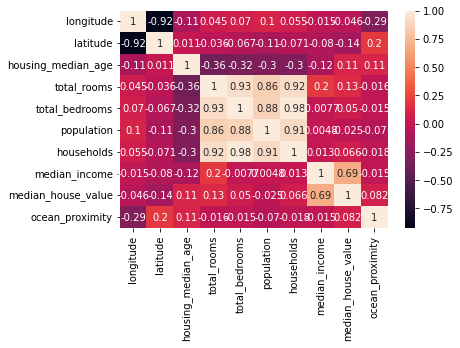

In [ ]:
correlation_matrix = housing_data.corr()
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
X = housing_data[['median_income', 'total_rooms', 'housing_median_age']]
Y = housing_data['median_house_value']

s = StandardScaler()
X = pd.DataFrame(s.fit(X).fit_transform(X))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 112283.16403677226
R2 score is 0.0444572869523252


The model performance for testing set
--------------------------------------
RMSE is 114612.1816846646
R2 score is 0.04790141955558602


## Statistical interpretations

R-squared and Adjusted R-Squared are both 0.51, removing median house age variable results in a depreciation of the model as both the R-squared and Adjusted R-squared decrease to 0.47. Since the range is not high the errors are not that high.
According to the t-value the variables have a good probabalistic standing and we are safe to reject the null hypothesis. Furthermore the f-statistic supports the idea of rejecting the null hypothesis as the ratio is greater than 1. The p-value of F-statistic is less than 0.05 so the null hypothesis again can be rejected here.

In [ ]:
X_train_off = sm.add_constant(X_train)
smRegression = sm.OLS(Y_train, X_train_off)
 
model = smRegression.fit()
print(model.summary())

 
ypred = model.predict(X_train_off)
rmse = sm.tools.eval_measures.rmse(Y_train, ypred)
 
print(rmse)

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     384.0
Date:                Sun, 19 Sep 2021   Prob (F-statistic):          9.43e-164
Time:                        22:33:38   Log-Likelihood:            -2.1544e+05
No. Observations:               16512   AIC:                         4.309e+05
Df Residuals:                   16509   BIC:                         4.309e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.064e+05    873.897    236.215      0.0